# Chen 1.3

In [1]:
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt

## Calculate the n vs. kT grid lines

In [2]:
def n_length(lambda_d, kte):
    """
    The number of particles given the particle energy and Debye
    length.

    Parameters
    ----------
    lambda_d: float, or np.array
        The Debye length in meters.
    kte: float, or np.array
        The particle energy in eV.

    Returns
    -------
    
        Number of particles.
    """
    return np.array([(5.53E7*kte/lambda_d**2)]).flatten()

def n_sphere(n_d, kte):
    """
    The number of particles given the particle energy and number of
    particles in the Debye sphere.

    Parameters
    ----------
    n_d: float, or np.array
        Number of particles in the Debye sphere
    kte: float, or np.array
        The particle energy in eV.

    Returns
    -------
    
        Number of particles.
    """
    return np.array([(1.72E12/n_d)**2 * kte**3]).flatten()

Evaluate the `n_length` and `n_sphere` with these inputs

In [3]:
kte_vals = np.logspace(-2, 5)  # eV
# ne_vals = np.logspace(6, 28)  # m^-3

For these values

In [4]:
lambda_d_vals = np.logspace(-8, 1, num=5)  # m
n_d_vals = np.logspace(3, 9, num=3)  # m^-3

## Values for plasma environments 1-7

In [5]:
plasma = namedtuple('plasma', ['n', 'kte', 'label'])

plasmas = [
    plasma(1E20, 3E4, 'fusion reactor'),
    plasma(1E19, 100, 'torus fusion experiment'),
    plasma(1E11, 0.05, 'ionosphere'),
    plasma(1E17, 1.5, 'radio-frequency plasma'),
    plasma(1E14, 0.1, 'flame'), 
    plasma(1E25, 100, 'laser plasma'),
    plasma(1E6, 0.01, 'interplanetary space')
]

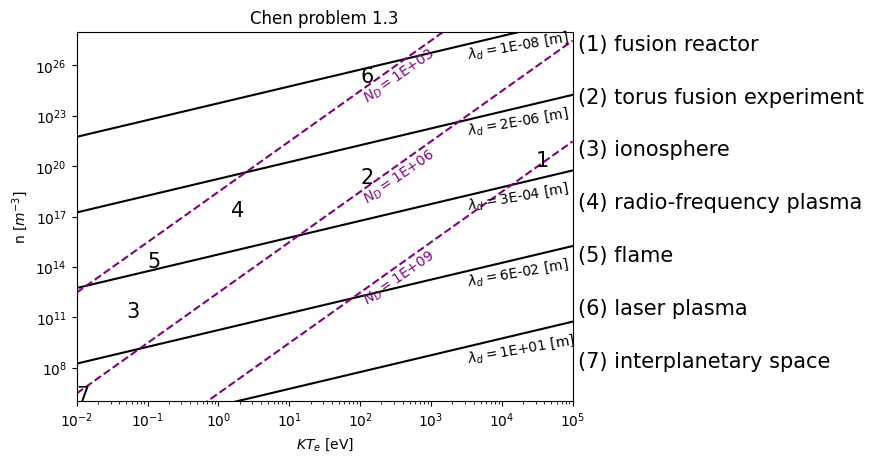

In [6]:
_, ax = plt.subplots()

# Lines with constant Debye length
for lambda_d in lambda_d_vals:
    n_length_values = n_length(lambda_d, kte_vals)
    ax.plot(kte_vals, n_length_values, c='k')
    ax.text(0.03*ax.get_xlim()[1], 0.3*n_length_values[-1], f'$\lambda_d=${lambda_d:.0E} [m]', 
        va='top', rotation=10)

# Lines with constant Debye sphere
for n_d in n_d_vals:
    n_sphere_values = n_sphere(n_d, kte_vals)
    ax.plot(kte_vals, n_sphere_values, c='purple', ls='--')
    ax.text(1E4*kte_vals[0], 5E14*n_sphere_values[0], f'$N_D=${n_d:.0E}',
        va='top', rotation=35, color='purple')

# Various plasmas
for i, _plasma in enumerate(plasmas, start=1):
    ax.text(_plasma.kte, _plasma.n, f'{i}', color='k', fontsize=15)
    ax.text(1.01, 0.95-(i-1)/7, f'({i}) {_plasma.label}', 
        transform=ax.transAxes, fontsize=15)

ax.set(
    xscale='log', yscale='log', xlim=(kte_vals.min(), kte_vals.max()),
    ylim=(1E6, 1E28), xlabel=f'$KT_e$ [eV]', ylabel=f'n [$m^{{-3}}$]',
    title='Chen problem 1.3'
);